In [117]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

DATADIR = Path('./Data')

net = cv2.dnn.readNetFromCaffe(str(Path('./caffe/deploy.prototxt')), str(Path('./caffe/res10_300x300_ssd_iter_140000.caffemodel')))

def detect_face(image):
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

    net.setInput(blob)
    detections = net.forward()

    for i in range(detections.shape[2]):

        confidence = detections[0, 0, i, 2]

        if confidence > 0.7:

            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (x, y, w, h) = box.astype("int")
            
            return image[y-50:h+50, x-50:w+50]
        
        return None

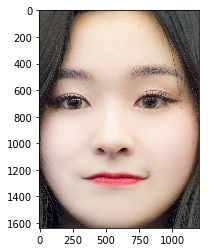

--------------------------------------------------------------------------------
With haar cascade:



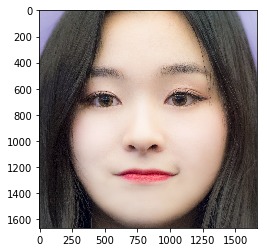

In [115]:
img = DATADIR / 'Gahyeon' / '3151.jpg'
img_array = cv2.imread(str(img))
color_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

face = detect_face(color_img)
if face is not None:
    plt.imshow(face)
    plt.show()
    
print('-' * 80)
    
import nbimporter
import dc_learning_haar_cascade

haar_detect_face = dc_learning_haar_cascade.detect_face

img = DATADIR / 'Gahyeon' / '4920.jpg'
img_array = cv2.imread(str(img))
color_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

face, rect = haar_detect_face(color_img)
print('With haar cascade:\n')
if face is not None:
    plt.imshow(face)
    plt.show()
else:
    print('No faces found')

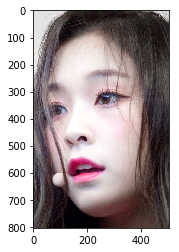

--------------------------------------------------------------------------------
With haar cascade:



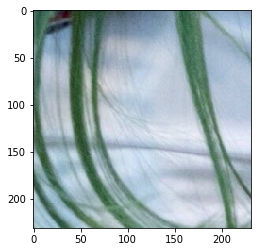

In [118]:
img = DATADIR / 'Gahyeon' / '4920.jpg'
img_array = cv2.imread(str(img))
color_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

face = detect_face(color_img)
if face is not None:
    plt.imshow(face)
    plt.show()
    
print('-' * 80)

img = DATADIR / 'Gahyeon' / '4920.jpg'
img_array = cv2.imread(str(img))
color_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

face, rect = haar_detect_face(color_img)
print('With haar cascade:\n')
if face is not None:
    plt.imshow(face)
    plt.show()
else:
    print('No faces found')

With caffe face detector:


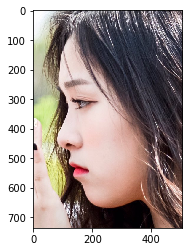

--------------------------------------------------------------------------------
With haar cascade:

No faces found


In [119]:
img = DATADIR / 'Gahyeon' / '2999.jpg'
img_array = cv2.imread(str(img))
color_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

face = detect_face(color_img)
print('With caffe face detector:')
if face is not None:
    plt.imshow(face)
    plt.show()
    
print('-' * 80)

img = DATADIR / 'Gahyeon' / '2999.jpg'
img_array = cv2.imread(str(img))
color_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

face, rect = haar_detect_face(color_img)
print('With haar cascade:\n')
if face is not None:
    plt.imshow(face)
    plt.show()
else:
    print('No faces found')

In [97]:
import random

IMG_SIZE = 100

def a_generator():
    """a generator that randomly pulls images from the Data directory, processes them with cv2, and yields them"""
    gahyeon = iter((DATADIR / 'Gahyeon').iterdir())
    handong = iter((DATADIR / 'Handong').iterdir())
    data_dict = {0: gahyeon, 1: handong}
    name_dict = {'Gahyeon':0, 'Handong':1}
    for i in range(10410):
        r = random.randint(0, 1)
        try:
            p = next(data_dict[r])
        except StopIteration:
            p = next(data_dict[1-r])
        
        try:
            img_array = cv2.imread(str(p))
            color_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            face = detect_face(color_img)
            if face is not None:
                face = cv2.resize(face, (IMG_SIZE, IMG_SIZE))
                yield face, name_dict[p.parent.name]
        except Exception:
            pass
    return

In [98]:
import time

X = []
y = []

start_time = time.time()

for i, (features, label) in enumerate(a_generator(), 1): 
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(f"Found {i} faces in {time.time() - start_time:.4f} sec")

Found 10016 faces in 1447.9025 sec


In [100]:
import pickle

save_path = Path('./Models/Caffe')

with open(save_path / 'X.pickle', 'wb') as file:
    pickle.dump(X, file)
    
with open(save_path / 'y.pickle', 'wb') as file:
    pickle.dump(y, file)